In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.decomposition import PCA



Рассмотрим пример данных, где каждое наблюдение характеризуется двумя переменными X и Y. Рассчитайте координаты центроида наблюдений, изображенных на графике. В поле для ответа введите координаты получившейся точки.

https://ucarecdn.com/ee2e7ce5-a157-4832-a5cb-9e935236fef8/

In [10]:
x = np.mean([-3,1,2,3,5,6,7])
y = np.mean([3,4,6,8,2,11,1])
print(f'x:{x}, y:{y}')

x=3.0, y=5.0


Вернемся к уже знакомым нам наблюдениям:
Предположим, это один из кластеров в наших данных, тогда чему будет равняться внутрикластерная сумма квадратов?



In [16]:
# Вариант 1
# Запишем координаты точек в виде массива numpy
X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])
# Обучим модель KMeans на нашем массиве с одним кластером
kmeans = KMeans(n_clusters=1).fit(X)
# Выведем координаты центроида данного кластера
print(kmeans.cluster_centers_)
# Выведем сумму квадратов расстояний точек от центроида = аттрибут модели kmeans
print(kmeans.inertia_)

[[3. 5.]]
146.0


In [18]:
# Вариант 2
Data = {'x': [-3,1,2,3,5,6,7],
        'y': [3,4,6,8,2,11,1]}
  
df = pd.DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(1)
kmeans.fit(df)
print(kmeans.inertia_)

146.0


In [20]:
# Вариант 3
dots = np.array([[-3,3],[1,4],[2,6],[3,8],[5,2],[6,11],[7,1]])

center = dots.mean(axis=0) #поиск центроида
squares = (dots - center)**2 #квадараты отклонения от центроида по каждой оси
sum_squares = squares.sum() #искомая сумма

sum_squares

146.0

### Task 1

Напишите функцию smart_hclust, которая получает на вход dataframe  с произвольным числом количественных переменных и число кластеров, которое необходимо выделить при помощи иерархической кластеризации.

Функция должна в исходный набор данных добавлять новую переменную фактор - cluster  -- номер кластера, к которому отнесено каждое из наблюдений.

In [2]:
data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test_data_hclust.csv')

def smart_hclust(data):
    # Вычисляем матрицу расстояний
    Z = linkage(data, method='average', metric='euclidean')
    # Визуализируем иерархическую кластеризацию
    dend = dendrogram(Z, orientation='left')
    # Разбиваем на кластеры; 2й параметр - порог отсечения
    labels = fcluster(Z, 9.5, criterion='distance')
    data['labels'] = labels
    return data

,X1,X2,X3,X4,X5,labels
0,11,7,10,10,8,1
1,9,10,10,8,6,1
2,9,2,12,14,11,2
3,9,11,8,10,3,1
4,7,9,10,11,14,2
5,9,11,9,6,9,1
6,16,20,22,19,16,4
7,23,18,21,24,16,4
8,15,21,14,21,21,3
9,19,20,15,17,17,3


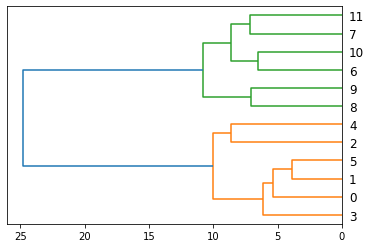

In [3]:
smart_hclust(data)

### Task 3

Напишите функцию get_pc﻿, которая получает на вход dataframe с произвольным числом количественных переменных. Функция должна выполнять анализ главных компонент и добавлять в исходные данные две новые колонки со значениями первой и второй главной компоненты. Новые переменные должны называться "PC1"  и "PC2" соответственно.

In [7]:
df = pd.read_csv(r'https://stepic.org/media/attachments/course/524/pca_test.csv')

In [8]:
pca = PCA(n_components=2)

def get_pc(df):
    return df.assign(pc1=pca.fit_transform(df)[:, 0], 
           pc2=pca.fit_transform(df)[:, 1])

In [9]:
get_pc(df)

,V1,V2,V3,V4,V5,pc1,pc2
0,13,15,12,13,12,-4.500822,-2.364595
1,16,11,8,12,6,3.039182,1.929687
2,15,7,10,12,13,-2.752467,5.076265
3,12,11,6,6,4,7.837194,-1.688535
4,11,13,13,10,12,-3.623088,-2.952822


### Task 4

Усложним предыдущую задачу! Напишите функцию get_pca2, которая принимает на вход dataframe с произвольным числом количественных переменных. Функция должна рассчитать, какое минимальное число главных компонент объясняет больше 90% изменчивости в исходных данных и добавлять значения этих компонент в исходный dataframe в виде новых переменных.

In [13]:
def get_pca2(df, threshold=0.9):
    pca = PCA(n_components=df.shape[1])
    fit = pca.fit_transform(df)
    n_components = sum(np.cumsum(pca.explained_variance_ratio_) < threshold) + 1
    return pd.concat([df, pd.DataFrame(fit[:, :n_components])], axis=1)

In [14]:
get_pca2(df, threshold=0.9)

,V1,V2,V3,V4,V5,0,1,2
0,13,15,12,13,12,-4.500822,-2.364595,2.054657
1,16,11,8,12,6,3.039182,1.929687,3.234643
2,15,7,10,12,13,-2.752467,5.076265,-1.868558
3,12,11,6,6,4,7.837194,-1.688535,-1.581097
4,11,13,13,10,12,-3.623088,-2.952822,-1.839644
